In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [3]:
final = pd.concat([train, test])

In [4]:
train.head()

,ID,gender,age,height,weight,cholesterol,systolic_blood_pressure,diastolic_blood_pressure,glucose,bone_density,activity,smoke_status,medical_history,family_medical_history,sleep_pattern,edu_level,mean_working,stress_score
0,TRAIN_0000,F,72,161.49,58.47,279.84,165,100,143.35,0.87,moderate,ex-smoker,high blood pressure,diabetes,sleep difficulty,bachelors degree,NaN,0.63
1,TRAIN_0001,M,88,179.87,77.60,257.37,178,111,146.94,0.07,moderate,ex-smoker,NaN,diabetes,normal,graduate degree,NaN,0.83
2,TRAIN_0002,M,47,182.47,89.93,226.66,134,95,142.61,1.18,light,ex-smoker,NaN,NaN,normal,high school diploma,9.0,0.70
3,TRAIN_0003,M,69,185.78,68.63,206.74,158,92,137.26,0.48,intense,ex-smoker,high blood pressure,NaN,oversleeping,graduate degree,NaN,0.17
4,TRAIN_0004,F,81,164.63,71.53,255.92,171,116,129.37,0.34,moderate,ex-smoker,diabetes,diabetes,sleep difficulty,bachelors degree,NaN,0.36


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        3000 non-null   object 
 1   gender                    3000 non-null   object 
 2   age                       3000 non-null   int64  
 3   height                    3000 non-null   float64
 4   weight                    3000 non-null   float64
 5   cholesterol               3000 non-null   float64
 6   systolic_blood_pressure   3000 non-null   int64  
 7   diastolic_blood_pressure  3000 non-null   int64  
 8   glucose                   3000 non-null   float64
 9   bone_density              3000 non-null   float64
 10  activity                  3000 non-null   object 
 11  smoke_status              3000 non-null   object 
 12  medical_history           1711 non-null   object 
 13  family_medical_history    1514 non-null   object 
 14  sleep_pa

In [6]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,3000.0,53.068000,20.672070,17.00,35.0000,53.000,72.0000,89.00
height,3000.0,168.585687,9.351876,141.13,161.8000,168.115,175.3525,195.28
weight,3000.0,72.486680,13.167222,36.32,63.0350,71.240,81.8325,120.88
cholesterol,3000.0,233.910523,24.333434,148.81,216.9275,234.255,250.3775,313.35
systolic_blood_pressure,3000.0,146.144333,15.845310,97.00,135.0000,146.000,158.0000,191.00
diastolic_blood_pressure,3000.0,95.504000,9.895283,60.00,89.0000,95.000,102.0000,124.00
glucose,3000.0,126.467720,18.536844,70.05,113.9125,126.555,139.1800,185.74
bone_density,3000.0,0.933367,0.444783,-0.22,0.5600,0.940,1.3000,2.00
mean_working,1968.0,8.716972,1.628944,4.00,8.0000,9.000,10.0000,16.00
stress_score,3000.0,0.482130,0.288252,0.00,0.2300,0.480,0.7300,1.00


In [7]:
(train.isnull().mean()*100).sort_values(ascending=False)

family_medical_history      49.533333
medical_history             42.966667
mean_working                34.400000
edu_level                   20.233333
gender                       0.000000
ID                           0.000000
age                          0.000000
height                       0.000000
weight                       0.000000
cholesterol                  0.000000
bone_density                 0.000000
glucose                      0.000000
diastolic_blood_pressure     0.000000
systolic_blood_pressure      0.000000
activity                     0.000000
smoke_status                 0.000000
sleep_pattern                0.000000
stress_score                 0.000000
dtype: float64

Text(0.5, 1.0, 'Stress Score Distribution')

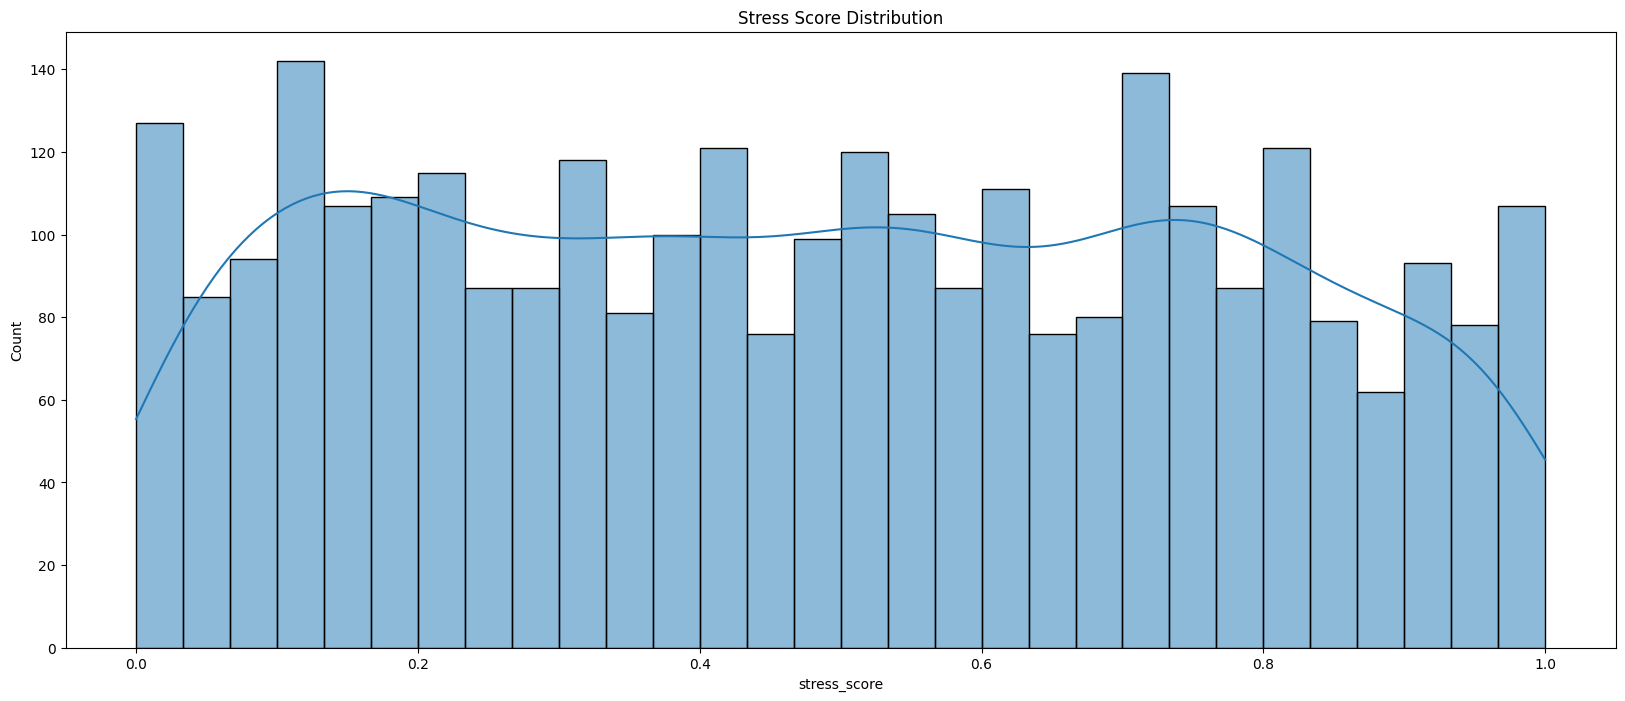

In [8]:
plt.figure(figsize=(20, 8))
sns.histplot(train['stress_score'], kde=True, bins=30)
plt.title('Stress Score Distribution')

In [9]:
train['bmi'] = (train['weight'] / (train['height']*0.01)**2)
train['blood_pressure_diff'] = train['systolic_blood_pressure'] - train['diastolic_blood_pressure']

Text(0.5, 1.05, 'Stress Score by numeric')

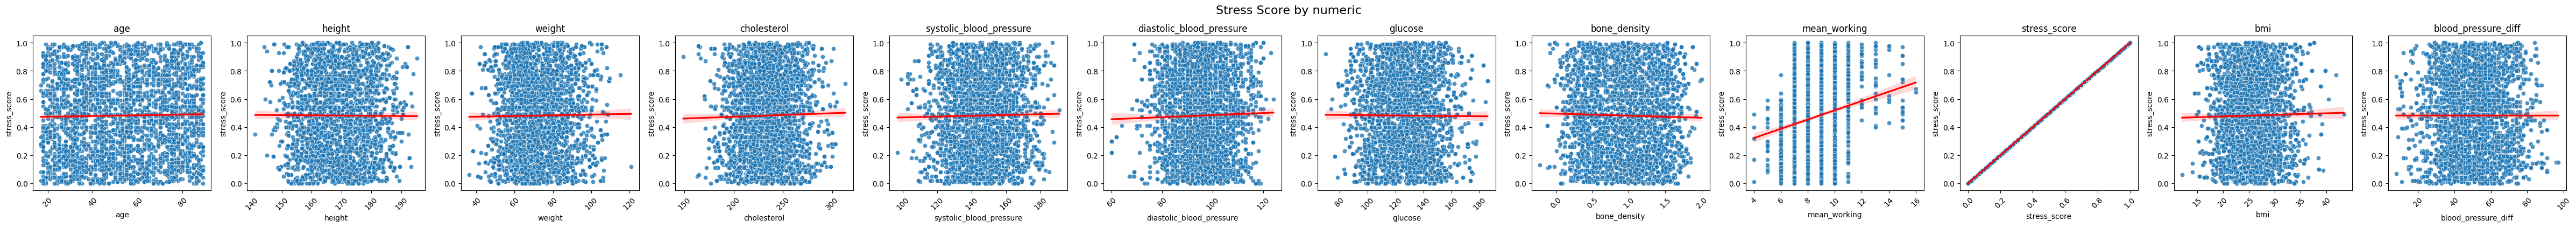

In [10]:
num_cols = [i for i in train.select_dtypes(include=['number'])]

plt.figure(figsize=(len(num_cols)*4, 4))

for i, col in enumerate(num_cols):
    plt.subplot(1, len(num_cols), i+1)
    sns.scatterplot(data=train, x=col, y='stress_score', alpha=0.8)
    sns.regplot(data=train, x=col, y='stress_score', scatter=False, color='red')
    plt.title(col)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.suptitle('Stress Score by numeric', fontsize=16, y=1.05)

Text(0.5, 1.05, 'Mean Working by numeric')

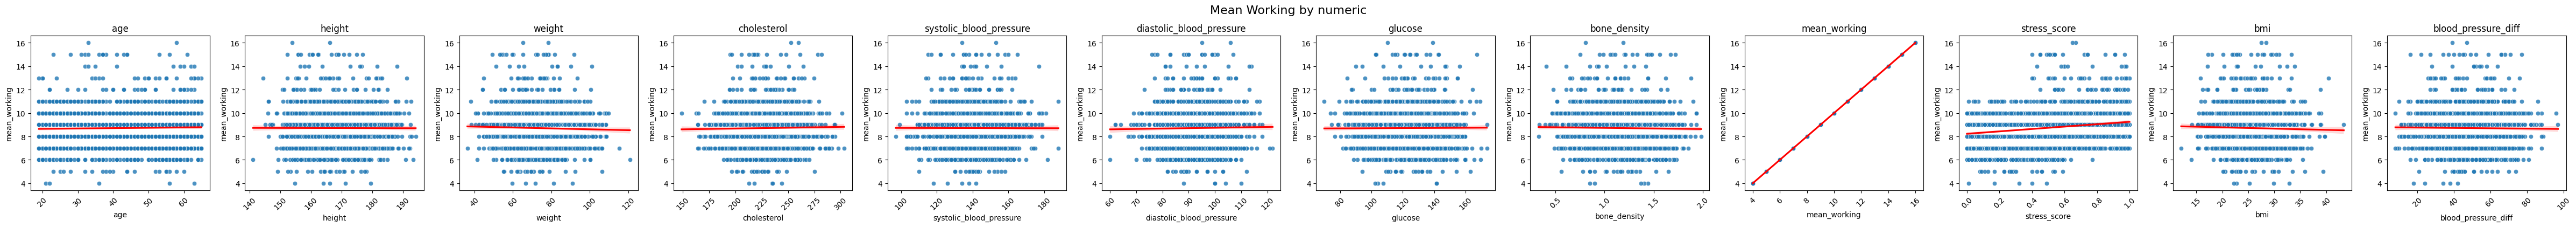

In [11]:
num_cols = [i for i in train.select_dtypes(include=['number'])]

plt.figure(figsize=(len(num_cols)*4, 4))

for i, col in enumerate(num_cols):
    plt.subplot(1, len(num_cols), i+1)
    sns.scatterplot(data=train, x=col, y='mean_working', alpha=0.8)
    sns.regplot(data=train, x=col, y='mean_working', scatter=False, color='red')
    plt.title(col)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.suptitle('Mean Working by numeric', fontsize=16, y=1.05)

Text(0.5, 1.0, 'Correlation Heatmap')

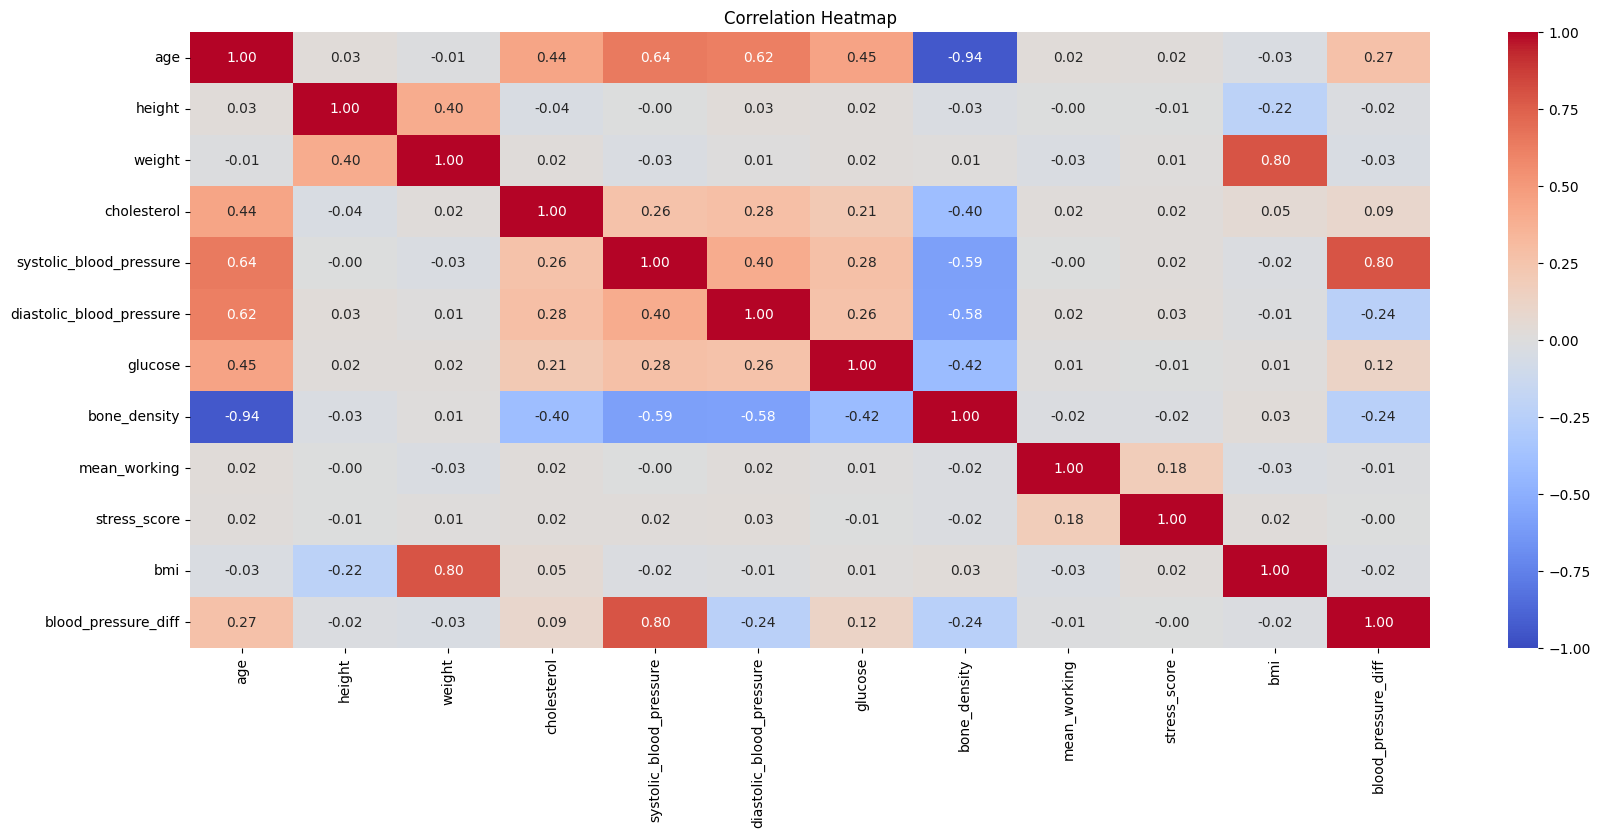

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

heatmap_cols = [i for i in train.select_dtypes(include=['number'])]

plt.figure(figsize=(20, 8))
corr = train[heatmap_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')

Text(0.5, 1.05, 'Stress Score by Category')

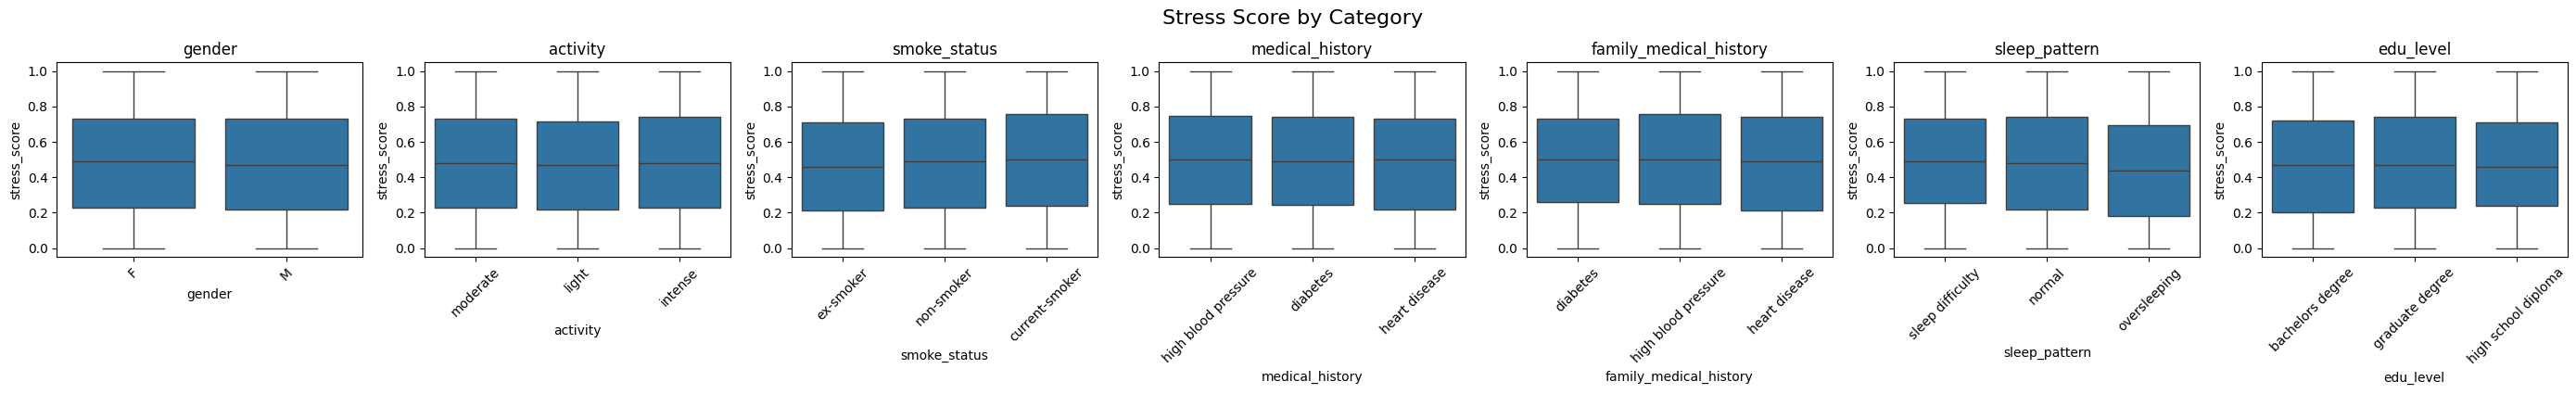

In [13]:
cat_cols = [i for i in train.select_dtypes(include=['object']) if i != 'ID']

plt.figure(figsize=(len(cat_cols)*4, 4))

for i, col in enumerate(cat_cols):
    plt.subplot(1, len(cat_cols), i+1)
    sns.boxplot(data=train, x=col, y='stress_score')
    plt.title(col)
    plt.xticks(rotation=45)
    
plt.tight_layout()
plt.suptitle('Stress Score by Category', fontsize=16, y=1.05)

In [14]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer

X = train.copy()

# 중앙값 대체
imp_median = SimpleImputer(strategy='median')
X['mean_working_median'] = imp_median.fit_transform(X[['mean_working']])

# KNN 또는 IterativeImputer
imp_knn = KNNImputer(n_neighbors=5)
X['mean_working_knn'] = imp_knn.fit_transform(X[['mean_working']])

imp_iter = IterativeImputer(random_state=42)
X['mean_working_iter'] = imp_iter.fit_transform(X[['mean_working']])

In [15]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 사용할 피처 집합 설정 (나머지 전처리는 동일하게!)
feature_sets = [
    'mean_working_median',
    'mean_working_knn',
    'mean_working_iter'
]

results = {}

for feat in feature_sets:
    X_model = X.copy()
    X_model['mean_working'] = X_model[feat]
    y = X['stress_score']

    # ★ 범주형 변수 category로 변환
    for col in X_model.select_dtypes(include='object').columns:
        X_model[col] = X_model[col].astype('category')

    drop_cols = ['stress_score', 'ID', 'mean_working_median', 'mean_working_knn', 'mean_working_iter']
    X_model = X_model.drop([c for c in drop_cols if c in X_model.columns], axis=1)
    
    X_train, X_val, y_train, y_val = train_test_split(X_model, y, test_size=0.2, random_state=42)
    
    model = LGBMRegressor(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    results[feat] = mse

print("결측치 대체별 성능 (MSE):")
for k, v in results.items():
    print(f"{k}: {v:.5f}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000248 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1789
[LightGBM] [Info] Number of data points in the train set: 2400, number of used features: 18
[LightGBM] [Info] Start training from score 0.481912
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000178 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1790
[LightGBM] [Info] Number of data points in the train set: 2400, number of used features: 18
[LightGBM] [Info] Start training from score 0.481912
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000272 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1790
[LightGBM] [Info] Number of data points in the train set: 2400, number of used features: 18
[LightGBM] [Info] Start traini

수치형 결측치 mean_working 중앙값으로 처리

In [16]:
from sklearn.impute import SimpleImputer

imp_median = SimpleImputer(strategy='median')
train['mean_working'] = imp_median.fit_transform(train[['mean_working']])
test['mean_working'] = imp_median.transform(test[['mean_working']])

Text(0.5, 1.05, 'Stress Score by numeric')

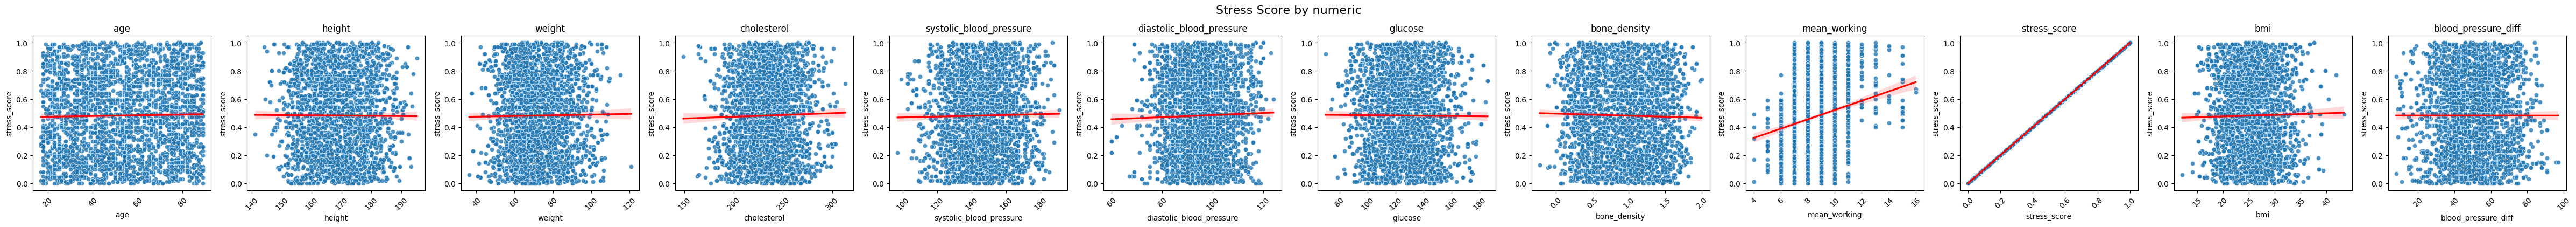

In [17]:
num_cols = [i for i in train.select_dtypes(include=['number'])]

plt.figure(figsize=(len(num_cols)*4, 4))

for i, col in enumerate(num_cols):
    plt.subplot(1, len(num_cols), i+1)
    sns.scatterplot(data=train, x=col, y='stress_score', alpha=0.8)
    sns.regplot(data=train, x=col, y='stress_score', scatter=False, color='red')
    plt.title(col)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.suptitle('Stress Score by numeric', fontsize=16, y=1.05)

Text(0.5, 1.0, 'Correlation Heatmap')

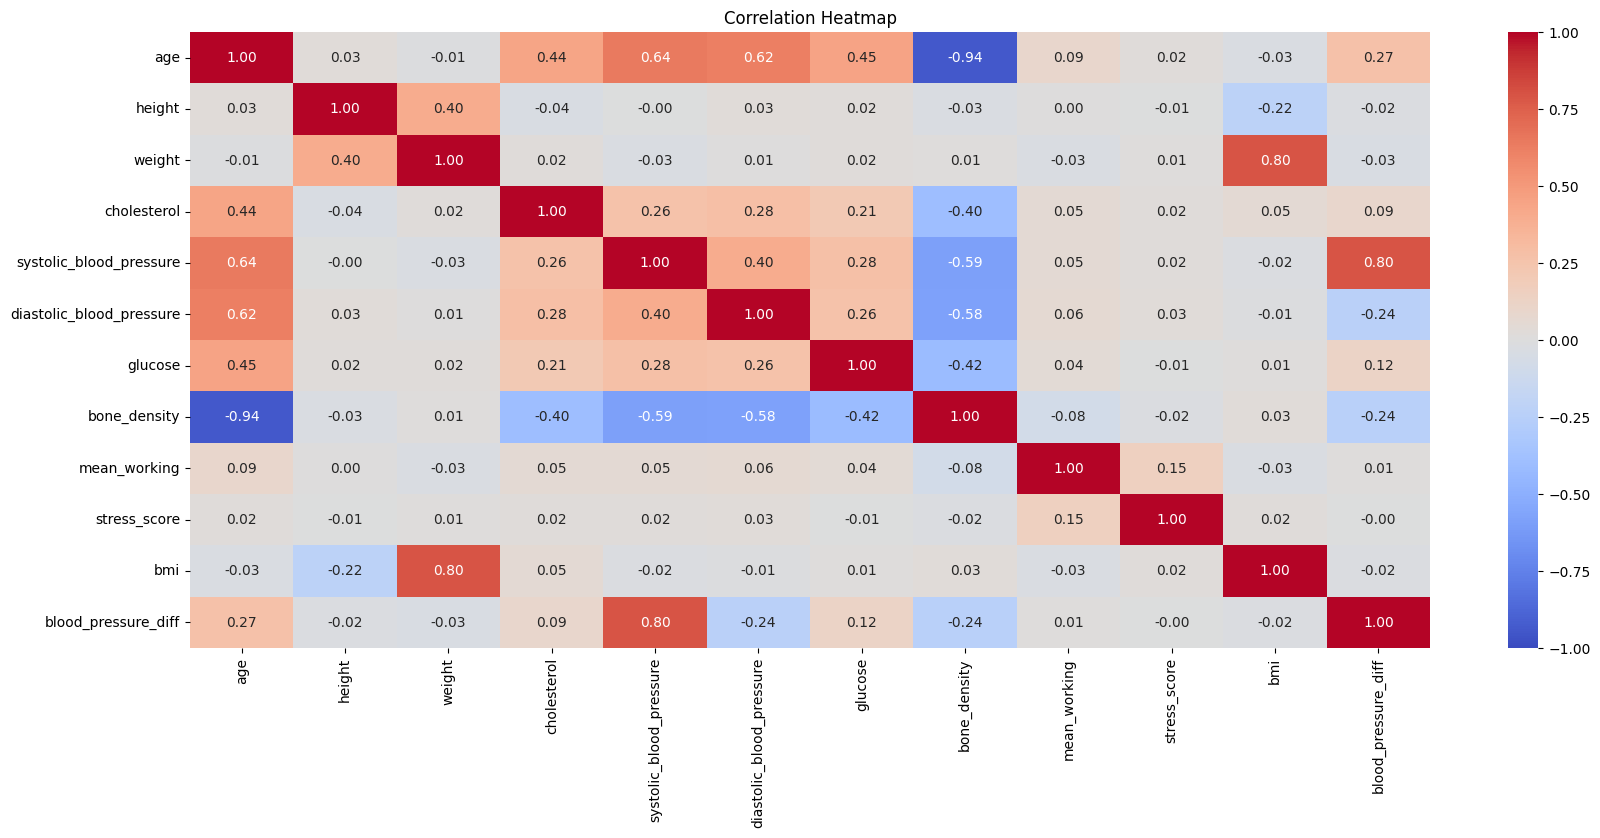

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

heatmap_cols = [i for i in train.select_dtypes(include=['number'])]

plt.figure(figsize=(20, 8))
corr = train[heatmap_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')

In [19]:
train['family_medical_history'] = train['family_medical_history'].fillna('Missing')
test['family_medical_history'] = test['family_medical_history'].fillna('Missing')

train['medical_history'] = train['medical_history'].fillna('Missing')
test['medical_history'] = test['medical_history'].fillna('Missing')

train['edu_level'] = train['edu_level'].fillna('Missing')
test['edu_level'] = test['edu_level'].fillna('Missing')

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = train.copy()
y = X['stress_score']

drop_cols = ['stress_score', 'ID']
X = X.drop([c for c in drop_cols if c in X.columns], axis=1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

for col in X_train.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    # train, val 합쳐서 fit
    tmp = pd.concat([X_train[col], X_val[col]], axis=0)
    le.fit(tmp)
    X_train[col] = le.transform(X_train[col])
    X_val[col] = le.transform(X_val[col])

In [21]:
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

models = {
    "LGBM": LGBMRegressor(random_state=42),
    "XGB": XGBRegressor(random_state=42),
    "RF": RandomForestRegressor(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    results[name] = mse

print(results)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 2400, number of used features: 18
[LightGBM] [Info] Start training from score 0.481912
{'LGBM': 0.06142978142557297, 'XGB': 0.05903764948395678, 'RF': 0.055320614649999995}


In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val, y_pred)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

MSE: 0.055320614649999995
RMSE: 0.23520334744641708
MAE: 0.18743916666666666


In [24]:
r2 = r2_score(y_val, y_pred)
print("R^2 score:", r2)

R^2 score: 0.2995824215963908
